# Wczytanie bibliotek

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns
%matplotlib inline

# Regresja liniowa

### Ćwiczenie 1: regresja liniowa, przykład ilustracyjny

Dla danych dane1 dotyczących wielkości czynszu za mieszkanie w zależności od jego wielkości, zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie.

In [2]:
dane1 = pd.read_csv("dane1.csv")

In [3]:
dane1.head()

,rent,size
0,410.97,40
1,175.81,61
2,1113.78,140
3,314.74,59
4,551.55,57


In [4]:
dane1.describe()

,rent,size
count,100.000000,100.000000
mean,595.513300,69.550000
std,242.718557,23.773075
min,163.170000,27.000000
25%,426.360000,52.750000
50%,563.985000,68.000000
75%,755.555000,82.250000
max,1288.480000,146.000000


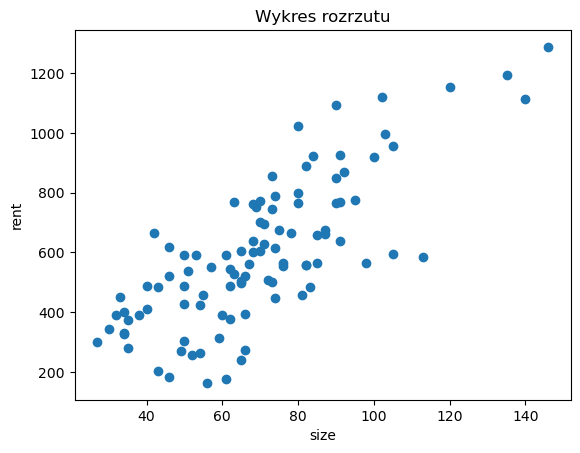

In [5]:
plt.scatter(dane1["size"], dane1["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [6]:
dane1.corr()

,rent,size
rent,1.000000,0.772484
size,0.772484,1.000000


podział zbioru na treingowy (75%) i testowy (25%)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dane1["size"], dane1["rent"], random_state = 17)

In [8]:
X_train.shape

(75,)

In [9]:
X_test.shape

(25,)

In [10]:
X_train = np.array(X_train).reshape(-1,1)

In [11]:
X_train.shape

(75, 1)

In [12]:
X_test = np.array(X_test).reshape(-1,1)

In [13]:
X_test.shape

(25, 1)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Wszystkie modele uczenia maszynowego w bibliotece scikit-learn są implementowane we własnych klasach.
Zanim użyjemy modelu tworzymy instancję klasy w obiekcie. Wtedy możemy ustawić dowolne parametry modelu.
Aby zbudować model na zbiorze treningowym, wywołujemy metodę fit. Dodatkowo, dla modeli nadzorowanych mamy metody predict 
i score.

In [14]:
model1 = LinearRegression()

In [15]:
model1.fit(X_train, y_train)

LinearRegression()

In [16]:
model1.coef_

array([8.42612781])

In [17]:
model1.intercept_

19.478164422552936

Prosta ma równanie: y = 8.43x + 19.48

In [18]:
model1.score(X_train, y_train)

0.6275446996480708

In [19]:
model1.score(X_test, y_test)

0.35489308667177066

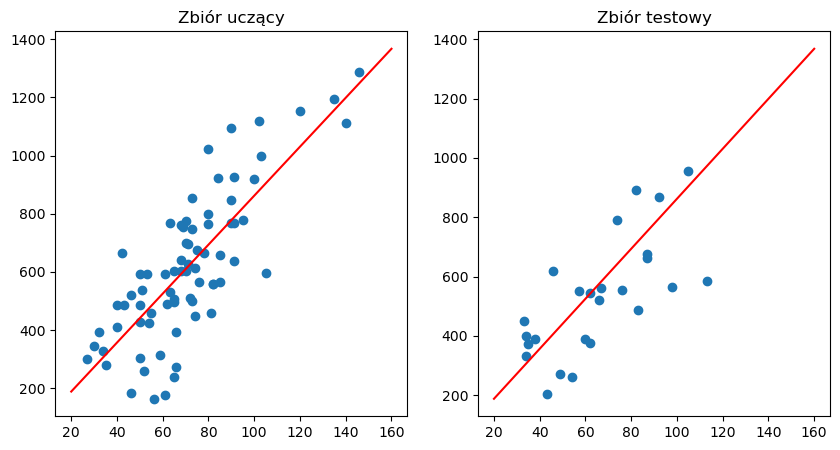

In [20]:
X_line = np.linspace(20, 160, 100).reshape(-1,1)
y_line = model1.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

### Zadanie 1: obserwacje odstające

Dla danych dane2 dotyczących wielkości czynszu za mieszkanie w zależności od jego wielkości, zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie. Dlaczego dopasowanie jest kiepskie i jak je można poprawić?

In [21]:
dane2 = pd.read_csv("dane2.csv")

In [22]:
dane2.describe()

,rent,size
count,102.000000,102.000000
mean,550.308333,71.509804
std,275.561876,28.668382
min,100.000000,24.000000
25%,347.512500,57.000000
50%,521.910000,67.500000
75%,660.545000,85.000000
max,1661.550000,180.000000


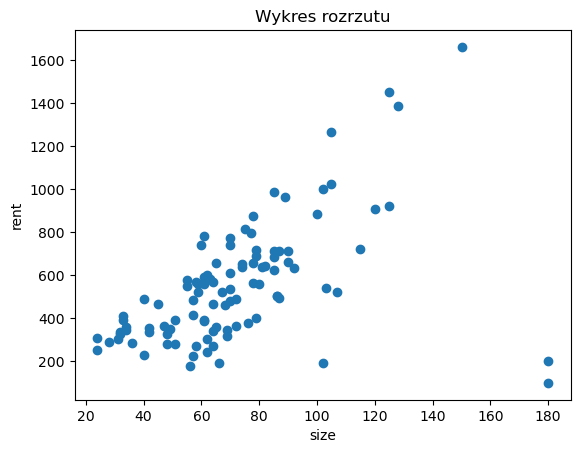

In [23]:
plt.scatter(dane2["size"], dane2["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dane2["size"], dane2["rent"], random_state = 7)

In [25]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [26]:
model1 = LinearRegression()

In [27]:
model1.fit(X_train, y_train)

LinearRegression()

In [28]:
model1.score(X_train, y_train)

0.15688941249819333

In [29]:
model1.score(X_test, y_test)

0.3166617728651069

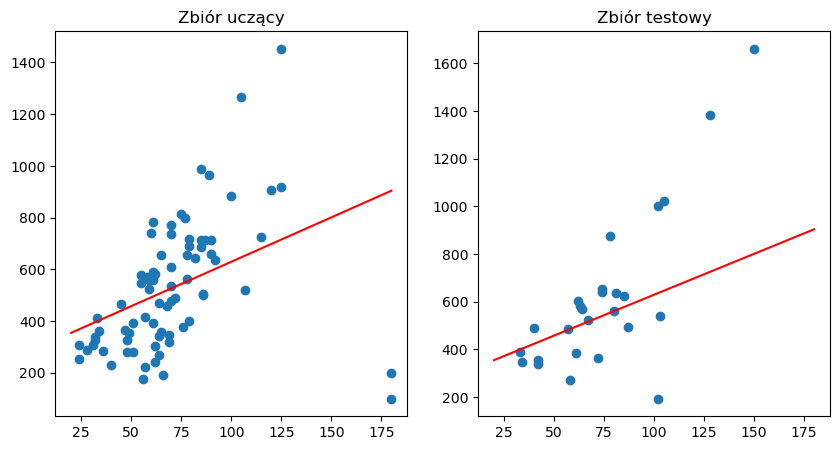

In [30]:
X_line = np.linspace(20, 180, 100).reshape(-1,1)
y_line = model1.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X_train, y_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X_test, y_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

Usuwamy obserwacje odstające

In [31]:
def find_outliers_IQR(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    IQR = q3 - q1
    outliers = df[((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5*IQR)))]
    return outliers

In [32]:
outliers_rent = find_outliers_IQR(dane2["rent"])

In [33]:
outliers_rent

1     1266.05
17    1661.55
21    1452.93
70    1385.12
Name: rent, dtype: float64

In [34]:
outliers_size = find_outliers_IQR(dane2["size"])

In [35]:
outliers_size

17     150
70     128
100    180
101    180
Name: size, dtype: int64

Jeżeli to nie błędy, usuwamy ze zbioru treningowego

In [36]:
dane2_wo = dane2.drop([1, 17, 21, 70, 100, 101])

In [37]:
dane2.shape

(102, 2)

In [38]:
dane2_wo.shape

(96, 2)

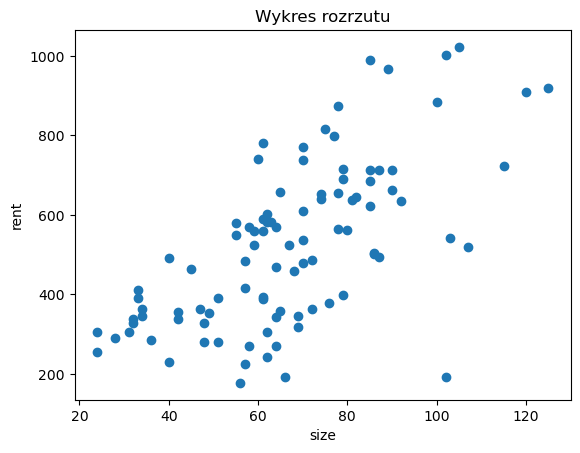

In [39]:
plt.scatter(dane2_wo["size"], dane2_wo["rent"])
plt.title("Wykres rozrzutu")
plt.xlabel("size")
plt.ylabel("rent")
plt.show()

In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dane2_wo["size"], dane2_wo["rent"], random_state = 7)

In [41]:
X2_train = np.array(X2_train).reshape(-1,1)
X2_test = np.array(X2_test).reshape(-1,1)

In [42]:
model2 = LinearRegression()

In [43]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [44]:
model2.score(X2_train, y2_train)

0.4289764346610704

In [45]:
model2.score(X2_test, y2_test)

0.4053413092364553

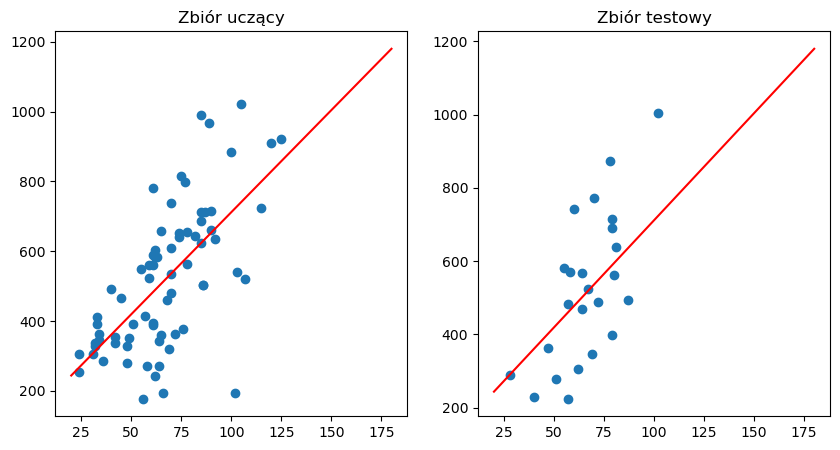

In [46]:
X_line = np.linspace(20, 180, 100).reshape(-1,1)
y_line = model2.predict(X_line)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.scatter(X2_train, y2_train)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór uczący")

plt.subplot(122)
plt.scatter(X2_test, y2_test)
plt.plot(X_line, y_line, c = "red")
plt.title("Zbiór testowy")

plt.show()

### Zadanie 2: transformacja y

Dla danych dane3 zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Znajdź równanie prostej regresji i przedstaw ją 
na wykresie. Dlaczego dopasowanie jest kiepskie i jak je można poprawić?

In [47]:
x, y = make_regression(n_samples = 1000, n_features = 1, noise = 100, random_state = 0)
y = np.expm1((y + abs(y.min())) / 200).reshape(-1, 1)
dane3 = pd.DataFrame(np.hstack([x, y]), columns = ["x", "y"])

In [48]:
dane3.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.045257,12.297687
std,0.987527,9.189466
min,-3.046143,0.000000
25%,-0.698420,5.880022
50%,-0.058028,9.817371
75%,0.606951,15.769642
max,2.759355,78.967173


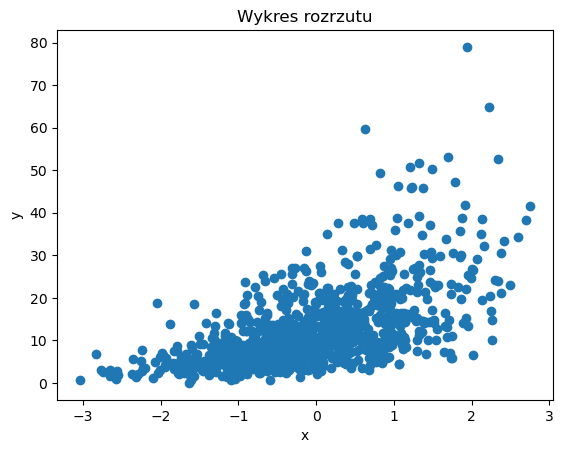

In [49]:
plt.scatter(dane3["x"], dane3["y"])
plt.title("Wykres rozrzutu")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(dane3["x"], dane3["y"], random_state = 7)

In [51]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [52]:
model1 = LinearRegression()

In [53]:
model1.fit(X_train, y_train)

LinearRegression()

In [54]:
model1.score(X_train, y_train)

0.34630287156902206

In [55]:
model1.score(X_test, y_test)

0.31094870313911327

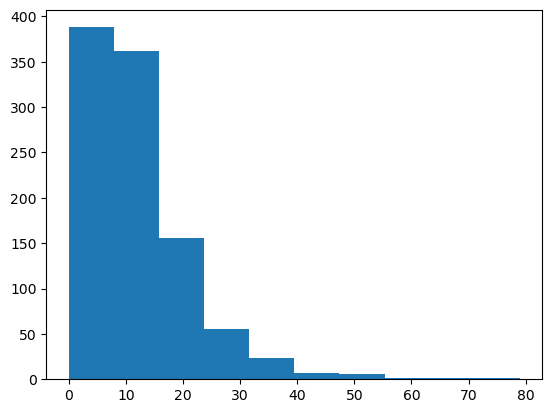

In [56]:
plt.hist(dane3["y"])
plt.show()

Przykładowe transformacje y: log, exp, sqrt. Zmienne objaśniające też można transformaować!! W regresji liniowej
chcemy żeby wszytskie zmienne miałay rozkłady podobne do normalnego.

In [57]:
dane3_log = dane3
dane3_log["y"] = np.log1p(dane3["y"]) # f(y) = ln(1+y)

Uwaga na transformacje! Dla predykcji wynik transformujemy fcją odwrotną!!! f(z)= e^z -1

In [58]:
dane3_log.describe()

,x,y
count,1000.000000,1000.000000
mean,-0.045257,2.385609
std,0.987527,0.639286
min,-3.046143,0.000000
25%,-0.698420,1.928622
50%,-0.058028,2.381153
75%,0.606951,2.819570
max,2.759355,4.381616


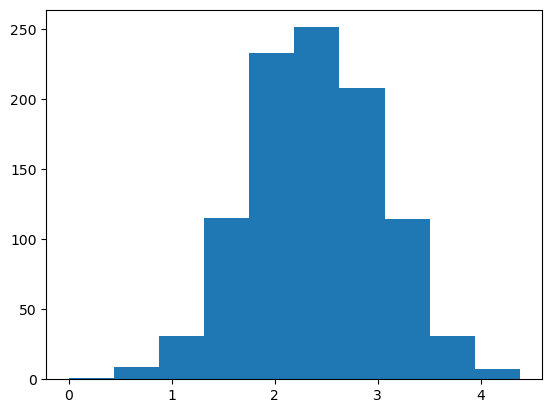

In [59]:
plt.hist(dane3_log["y"])
plt.show()

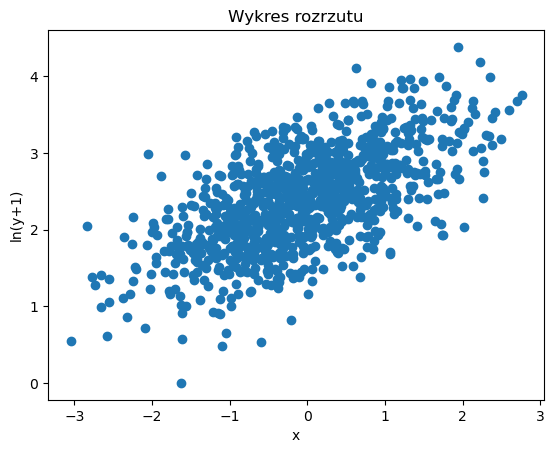

In [60]:
plt.scatter(dane3_log["x"], dane3_log["y"])
plt.title("Wykres rozrzutu")
plt.xlabel("x")
plt.ylabel("ln(y+1)")
plt.show()

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(dane3_log["x"], dane3_log["y"], random_state = 7)

In [62]:
X2_train = np.array(X2_train).reshape((-1,1))

In [63]:
X2_test = np.array(X2_test).reshape((-1,1))

In [64]:
model2 = LinearRegression()

In [65]:
model2.fit(X2_train, y2_train)

LinearRegression()

In [66]:
model2.score(X2_train, y2_train)

0.39815278567828416

In [67]:
model2.score(X2_test, y2_test)

0.39420930777812224

https://pl.wikipedia.org/wiki/Kwartet_Anscombe%E2%80%99a#/media/Plik:Anscombe's_quartet_3.svg

### Ćwiczenie 2: zmienne jakościowe

Dla danych dane4 zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Zmienną jakościową 
area zakoduj za pomocą zmiennych binarnych.

In [68]:
dane4 = pd.read_csv("dane4.csv")

In [69]:
dane4.describe()

,rent,area,year,size
count,2053.000000,2053.000000,2053.000000,2053.000000
mean,570.092981,11.267901,1957.983439,69.595226
std,245.434507,7.037447,24.879186,25.162558
min,77.310000,1.000000,1918.000000,17.000000
25%,389.950000,5.000000,1948.000000,53.000000
50%,534.300000,10.000000,1960.000000,67.000000
75%,700.480000,17.000000,1973.000000,83.000000
max,1789.550000,25.000000,2001.000000,185.000000


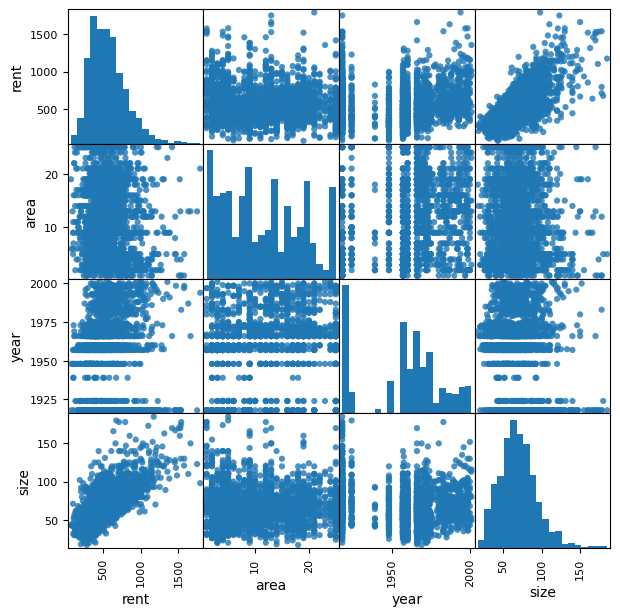

In [70]:
pd.plotting.scatter_matrix(dane4, figsize = (7,7), marker = "o", hist_kwds = {"bins": 20}, s = 20, alpha = 0.8)
plt.show()

In [71]:
dane4.dtypes

rent    float64
area      int64
year    float64
size      int64
dtype: object

In [72]:
dane4["area"] = dane4["area"].astype("category")

In [73]:
dane4.dtypes

rent     float64
area    category
year     float64
size       int64
dtype: object

In [74]:
dane4.value_counts("area")

area
9     177
2     161
5     139
4     137
3     132
25    117
16    115
19    106
13     98
18     82
12     78
11     70
7      69
17     67
6      66
8      62
14     60
10     58
21     56
20     50
15     43
1      43
24     29
22     24
23     14
dtype: int64

In [75]:
dane4_dummies = pd.get_dummies(dane4, drop_first = True)

In [76]:
dane4.head()

,rent,area,year,size
0,741.39,2,1918.0,68
1,715.82,2,1995.0,65
2,528.25,2,1918.0,63
3,553.99,16,1983.0,65
4,698.21,16,1995.0,100


In [77]:
dane4_dummies.head()

,rent,year,size,area_2,area_3,area_4,area_5,area_6,area_7,area_8,...,area_16,area_17,area_18,area_19,area_20,area_21,area_22,area_23,area_24,area_25
0,741.39,1918.0,68,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,715.82,1995.0,65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,528.25,1918.0,63,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,553.99,1983.0,65,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,698.21,1995.0,100,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [78]:
X = dane4_dummies.loc[:, "year":"area_25"]

In [79]:
y = dane4_dummies["rent"]

In [80]:
X.shape

(2053, 26)

In [81]:
y.shape

(2053,)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [83]:
model1 = LinearRegression()

In [84]:
model1.fit(X_train, y_train)

LinearRegression()

In [85]:
model1.score(X_train, y_train)

0.5843279655320448

In [86]:
model1.score(X_test, y_test)

0.49794932201655884

### Zadanie 3: Fish

https://www.kaggle.com/datasets/aungpyaeap/fish-market?resource=download

Dla danych Fish z Kaggle zbuduj model 
regresji liniowej na danych treningowych i oceń dopasowanie na danych testowych. Zmienną jakościowe zakoduj za pomocą zmiennych binarnych. Zmienną objaśnianą jest Weight. Uwaga na transformację i obs. odstające (pierwsza transformacja)

In [87]:
Fish = pd.read_csv("Fish.csv")
Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Eksploracja danych

In [88]:
Fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [89]:
Fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [90]:
Fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

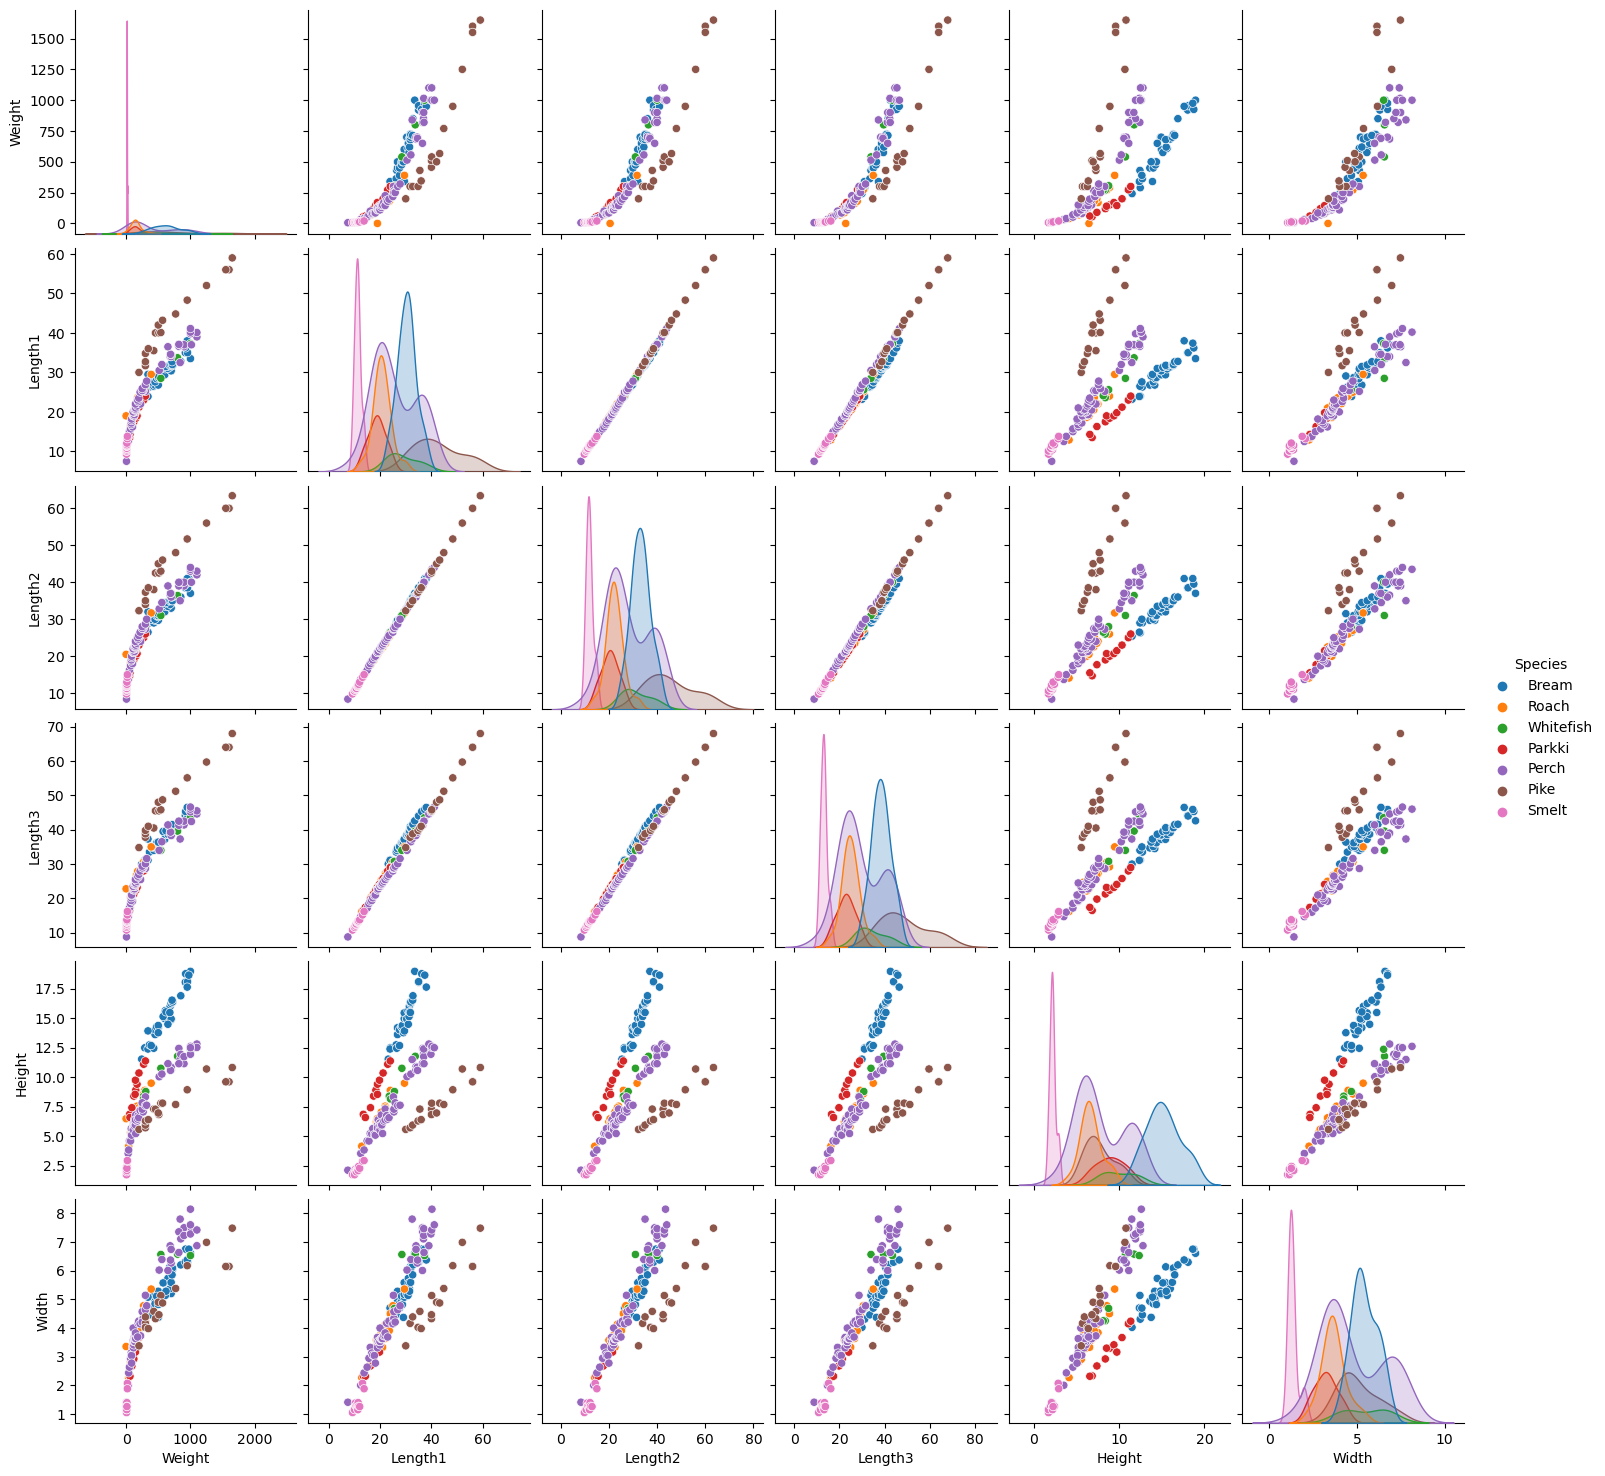

In [91]:
sns.pairplot(Fish, hue='Species')

# One hot encoding


In [92]:
Fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [93]:
dummies = pd.get_dummies(Fish['Species'], prefix='Species')
dummies

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [94]:
Fish.drop('Species',inplace=True,axis=1)

In [95]:
Fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [96]:
fish_new = pd.concat([Fish,dummies], axis=1)
fish_new

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


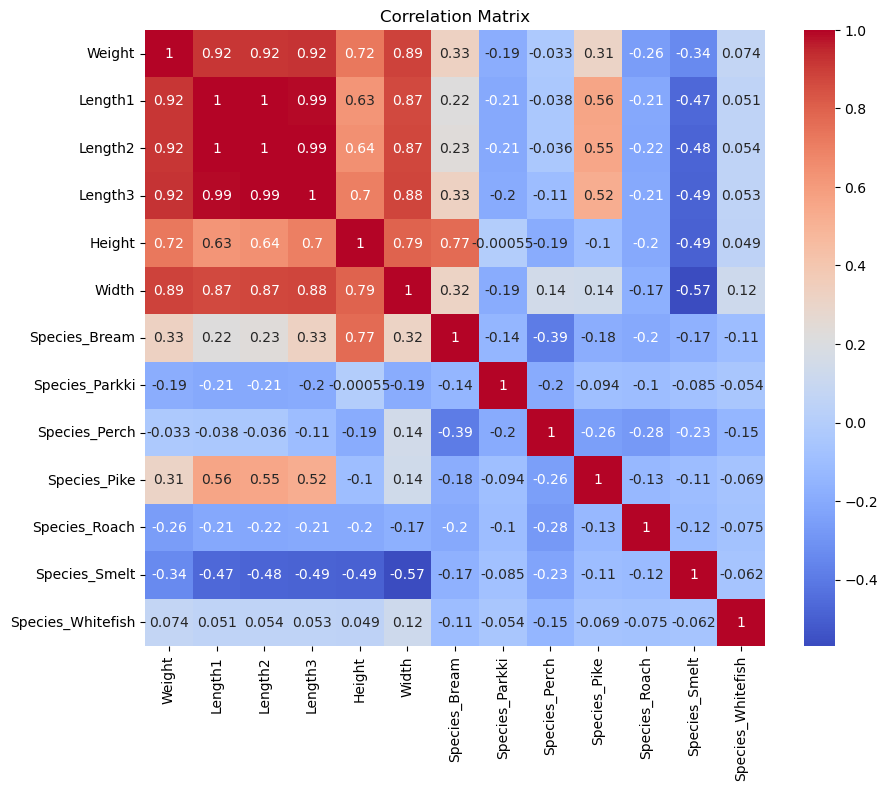

In [97]:
correlation_matrix = fish_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [98]:
X = fish_new.loc[:, "Length1":"Species_Whitefish"]

In [99]:
y = fish_new["Weight"]

In [100]:
X.shape

(159, 12)

In [101]:
y.shape

(159,)

# Tworzenie modelu 


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [103]:
model1 = LinearRegression()

In [104]:
model1.fit(X_train, y_train)

LinearRegression()

In [105]:
model1.score(X_train, y_train)

0.9357375300443219

In [106]:
model1.score(X_test, y_test)

0.9277003587589246

In [107]:
print("Slope:",model1.coef_)
print("Intercept:",model1.intercept_)
print("R square value:",model1.score(X_train,y_train))

Slope: [ -85.84319654   75.52756351   41.20479996   -2.13760457    7.73744521
  -83.66934693   71.74863643   30.94737538 -284.58771222  -12.74244726
  325.36174099  -47.05824639]
Intercept: -782.1085549469992
R square value: 0.9357375300443219


### Ćwiczenie 3: dodawanie wielomianów cech oryginalnych

Do danych dane5 (dane Bodyfat) dodaj wielomiany drugiego stopnia i stwórz zbiór uczący z większą liczbą zmiennych objaśniających. 

https://cran.r-project.org/web/packages/bbreg/bbreg.pdf

In [108]:
dane5 = pd.read_csv("dane5.csv")

In [109]:
dane5.describe()

,bodyfat,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.00000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,0.191508,0.448849,1.789244,0.701488,0.379921,1.008242,0.925560,0.999048,0.59406,0.385905,0.231024,0.322734,0.286639,0.182298
std,0.083687,0.126020,0.293892,0.036629,0.024309,0.084305,0.107831,0.071641,0.05250,0.024118,0.016949,0.030213,0.020207,0.009336
min,0.000010,0.220000,1.185000,0.295000,0.311000,0.793000,0.694000,0.850000,0.47200,0.330000,0.191000,0.248000,0.210000,0.158000
25%,0.124750,0.357500,1.590000,0.682500,0.364000,0.943500,0.845750,0.955000,0.56000,0.369750,0.220000,0.302000,0.273000,0.176000
50%,0.192000,0.430000,1.765000,0.700000,0.380000,0.996500,0.909500,0.993000,0.59000,0.385000,0.228000,0.320500,0.287000,0.183000
75%,0.253000,0.540000,1.970000,0.722500,0.394250,1.053750,0.993250,1.035250,0.62350,0.399250,0.240000,0.343250,0.300000,0.188000
max,0.475000,0.810000,3.631500,0.777500,0.512000,1.362000,1.481000,1.477000,0.87300,0.491000,0.339000,0.450000,0.349000,0.214000


In [110]:
dane5.shape

(252, 14)

In [111]:
X = dane5.loc[:, "age":"wrist"]

In [112]:
X.shape

(252, 13)

In [113]:
y =dane5["bodyfat"]

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [114]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [115]:
X_poly.shape

(252, 104)

In [116]:
poly.get_feature_names_out(poly.feature_names_in_)

array(['age', 'weight', 'height', 'neck', 'chest', 'abdomen', 'hip',
       'thigh', 'knee', 'ankle', 'biceps', 'forearm', 'wrist', 'age^2',
       'age weight', 'age height', 'age neck', 'age chest', 'age abdomen',
       'age hip', 'age thigh', 'age knee', 'age ankle', 'age biceps',
       'age forearm', 'age wrist', 'weight^2', 'weight height',
       'weight neck', 'weight chest', 'weight abdomen', 'weight hip',
       'weight thigh', 'weight knee', 'weight ankle', 'weight biceps',
       'weight forearm', 'weight wrist', 'height^2', 'height neck',
       'height chest', 'height abdomen', 'height hip', 'height thigh',
       'height knee', 'height ankle', 'height biceps', 'height forearm',
       'height wrist', 'neck^2', 'neck chest', 'neck abdomen', 'neck hip',
       'neck thigh', 'neck knee', 'neck ankle', 'neck biceps',
       'neck forearm', 'neck wrist', 'chest^2', 'chest abdomen',
       'chest hip', 'chest thigh', 'chest knee', 'chest ankle',
       'chest biceps', 'chest 

Jedna z uczestinczek znalazła czemu jest błąd, dziękuję!: mamy starą wersję pakietu stąd błąd, u nas zadziała: poly.get_feature_names(), później zostało to usunięte: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

### Ćwiczenie 3 c.d.: LASSO, zbiór walidacyjny

Dla danych X_poly i y zbuduj model regresji LASSO, wybierz najlepszy parametr alpha i oceń dopasowanie na 
zbiorze testowym. Porównaj wynik ze zwykłą metodą najmniejszych kwadratów.

podział zbioru na treningoy, walidacyjny i testowy

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 7, test_size = 0.3)

In [118]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state = 7, test_size = 0.5)

In [119]:
X_train.shape

(176, 104)

In [120]:
X_val.shape

(38, 104)

In [121]:
X_test.shape

(38, 104)

Używamy LASSO, dane trzeba przeskalować! my użyjemy StandardScaler, który powoduje, że wariancja kolumn jest równa 1. (x - mean)/sd

In [122]:
scaler1 = StandardScaler()

In [123]:
scaler1.fit(X_train)

StandardScaler()

In [124]:
X_train_scaled = scaler1.transform(X_train)

In [125]:
X_val_scaled = scaler1.transform(X_val)

In [126]:
model1 = LinearRegression()

In [127]:
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [128]:
mnk_score_train = model1.score(X_train_scaled, y_train)

In [129]:
mnk_score_train

0.9226289530013717

In [130]:
mnk_score_val = model1.score(X_val_scaled, y_val)

In [131]:
mnk_score_val

0.04082933806294997

Model MNK jest nadmiernie dopasowany (overfitting), czyli zbyt ściśle dopasowany do specyfiki zestawu uczącego i działa
dobrze na zestawie uczącym, ale nie potrafi uogólnić nowych danych. Model jest zbyt skomplikowany - ma za dużo zmiennych. 

# Źródła:

Hastie, Trevor, et al. The elements of statistical learning: data mining, inference, and prediction. Vol. 2. New York: springer, 2009.

Muller, Andreas, et al. Machine learning, Python i data science, Wprowadzenie. Helion, 2021.

Sklearn tutorials